In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
#Warnings
import warnings
warnings.filterwarnings('ignore')

#***Load the dataset :-***

In [2]:
#load the dataset
df=pd.read_csv('/content/Bollywood_dataset.csv')

In [3]:
df.head()

,Movie_Name,Release_Period,Whether_Remake,Whether_Franchise,Genre,New_Actor,New_Director,New_Music_Director,Lead_Star,Director,Music_Director,Number_of_Screens,Revenue(INR),Budget(INR)
0,Golden Boys,Normal,No,No,suspense,Yes,No,No,Jeet Goswami,Ravi Varma,Baba Jagirdar,5,5000000,85000
1,Kaccha Limboo,Holiday,No,No,drama,Yes,No,Yes,Karan Bhanushali,Sagar Ballary,Amardeep Nijjer,75,15000000,825000
2,Not A Love Story,Holiday,No,No,thriller,No,No,No,Mahie Gill,Ram Gopal Verma,Sandeep Chowta,525,75000000,56700000
3,Qaidi Band,Holiday,No,No,drama,Yes,No,No,Aadar Jain,Habib Faisal,Amit Trivedi,800,210000000,4500000
4,Chaatwali,Holiday,No,No,adult,Yes,Yes,Yes,Aadil Khan,Aadil Khan,Babloo Ustad,1,1000000,1075000


In [4]:
#shape of dataset
df.shape

(1698, 14)

#***EDA(Explotary Data Analysis):-***

In [5]:
#dataset information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1698 entries, 0 to 1697
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Movie_Name          1698 non-null   object
 1   Release_Period      1698 non-null   object
 2   Whether_Remake      1698 non-null   object
 3   Whether_Franchise   1698 non-null   object
 4   Genre               1698 non-null   object
 5   New_Actor           1698 non-null   object
 6   New_Director        1698 non-null   object
 7   New_Music_Director  1698 non-null   object
 8   Lead_Star           1698 non-null   object
 9   Director            1698 non-null   object
 10  Music_Director      1698 non-null   object
 11  Number_of_Screens   1698 non-null   int64 
 12  Revenue(INR)        1698 non-null   int64 
 13  Budget(INR)         1698 non-null   int64 
dtypes: int64(3), object(11)
memory usage: 185.8+ KB


In [6]:
#dataset describes
df.describe()

,Number_of_Screens,Revenue(INR),Budget(INR)
count,1698.000000,1.698000e+03,1.698000e+03
mean,553.831567,1.501674e+08,2.377287e+08
std,782.951839,2.434838e+08,6.134398e+08
min,1.000000,3.250000e+05,7.250000e+03
25%,30.000000,1.500000e+07,1.150000e+06
50%,200.000000,5.500000e+07,1.240000e+07
75%,800.000000,1.900000e+08,1.778325e+08
max,4600.000000,2.100000e+09,8.016120e+09


In [7]:
#dataset null values check
df.isnull().sum()

,0
Movie_Name,0
Release_Period,0
Whether_Remake,0
Whether_Franchise,0
Genre,0
New_Actor,0
New_Director,0
New_Music_Director,0
Lead_Star,0
Director,0


In [8]:
#check the duplicated rows
df.duplicated().sum()

np.int64(2)

In [9]:
df.columns

Index(['Movie_Name', 'Release_Period', 'Whether_Remake', 'Whether_Franchise',
       'Genre', 'New_Actor', 'New_Director', 'New_Music_Director', 'Lead_Star',
       'Director', 'Music_Director', 'Number_of_Screens', 'Revenue(INR)',
       'Budget(INR)'],
      dtype='object')

In [10]:
print("\nData types:\n", df.dtypes)


Data types:
 Movie_Name            object
Release_Period        object
Whether_Remake        object
Whether_Franchise     object
Genre                 object
New_Actor             object
New_Director          object
New_Music_Director    object
Lead_Star             object
Director              object
Music_Director        object
Number_of_Screens      int64
Revenue(INR)           int64
Budget(INR)            int64
dtype: object


In [30]:
#check the movies name column value counts
df['Movie_Name'].value_counts()

,count
Movie_Name,
Sanam Teri Kasam,2
Aatma,2
Game,2
Fatso,1
Mixed Doubles,1
...,...
Mohenjo Daro,1
Jodhaa Akbar,1
Kites,1


In [11]:
#categorical column list
categorical_columns = df.select_dtypes(include=['object']).columns
print("\nCategorical columns:\n", categorical_columns)


Categorical columns:
 Index(['Movie_Name', 'Release_Period', 'Whether_Remake', 'Whether_Franchise',
       'Genre', 'New_Actor', 'New_Director', 'New_Music_Director', 'Lead_Star',
       'Director', 'Music_Director'],
      dtype='object')


In [15]:
#remove the movie_name,director ,actor from categorical column
categorical_columns = categorical_columns.drop(['Movie_Name', 'Director', 'Lead_Star','Music_Director'])
print("\nUpdated categorical columns:\n", categorical_columns)


Updated categorical columns:
 Index(['Release_Period', 'Whether_Remake', 'Whether_Franchise', 'Genre',
       'New_Actor', 'New_Director', 'New_Music_Director'],
      dtype='object')


In [25]:
# Revenue per Screen
df['Revenue_per_Screen'] = df['Revenue(INR)'] / df['Number_of_Screens']
print("\nTop 5 movies by Revenue per Screen:\n", df[['Movie_Name', 'Revenue_per_Screen']].sort_values(by='Revenue_per_Screen', ascending=False).head())



Top 5 movies by Revenue per Screen:
                  Movie_Name  Revenue_per_Screen
550                Kajraare          60000000.0
64    Lessons In Forgetting          30000000.0
1201         Jaana Pehchana          15000000.0
997      Mumbhai Connection          10000000.0
1396              2 Chehare          10000000.0


In [16]:
#numerical column list
numerical_columns = df.select_dtypes(include=['int64', 'float64']).columns
print("\nNumerical columns:\n", numerical_columns)


Numerical columns:
 Index(['Number_of_Screens', 'Revenue(INR)', 'Budget(INR)'], dtype='object')


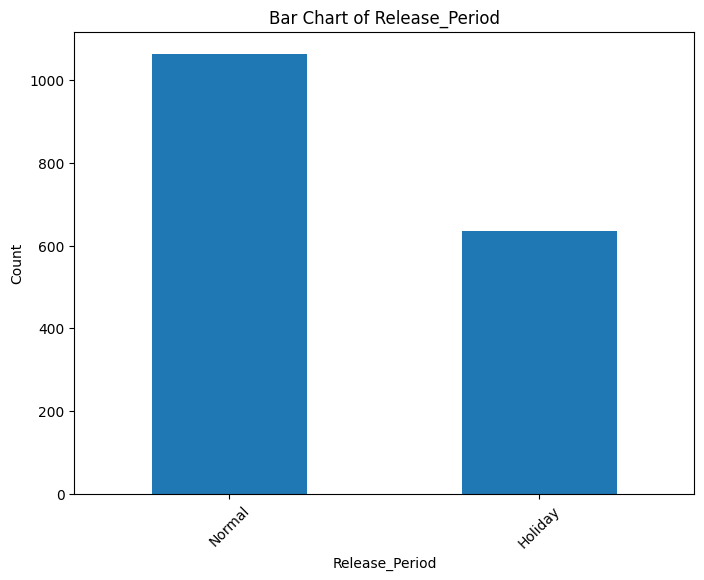

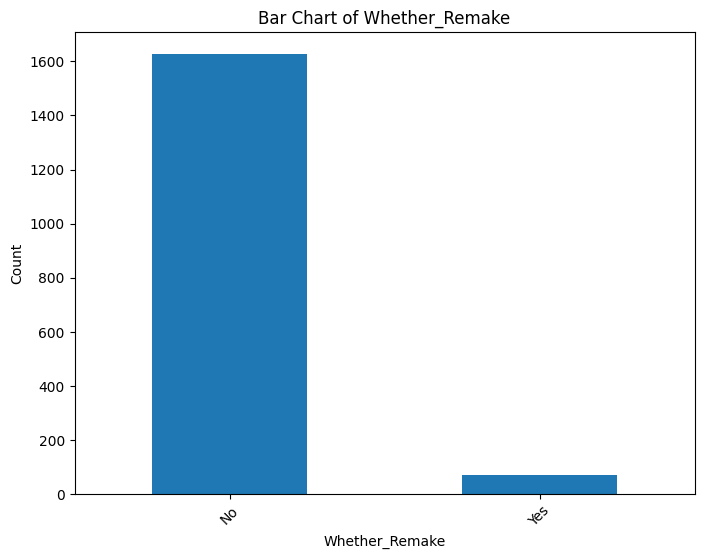

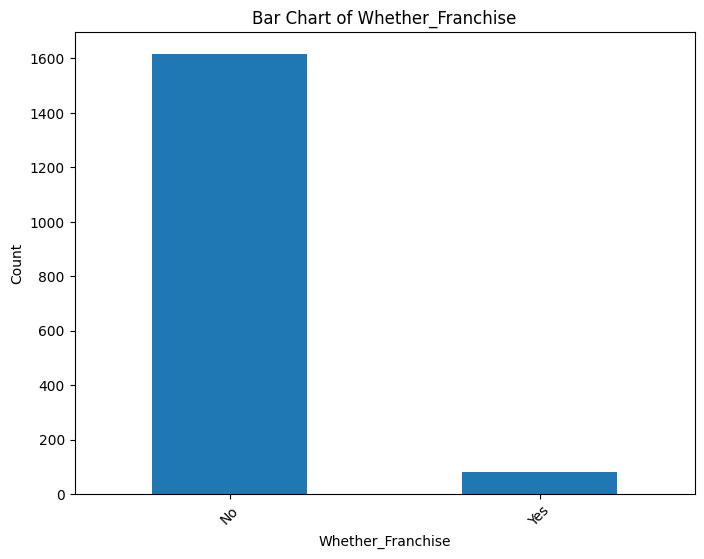

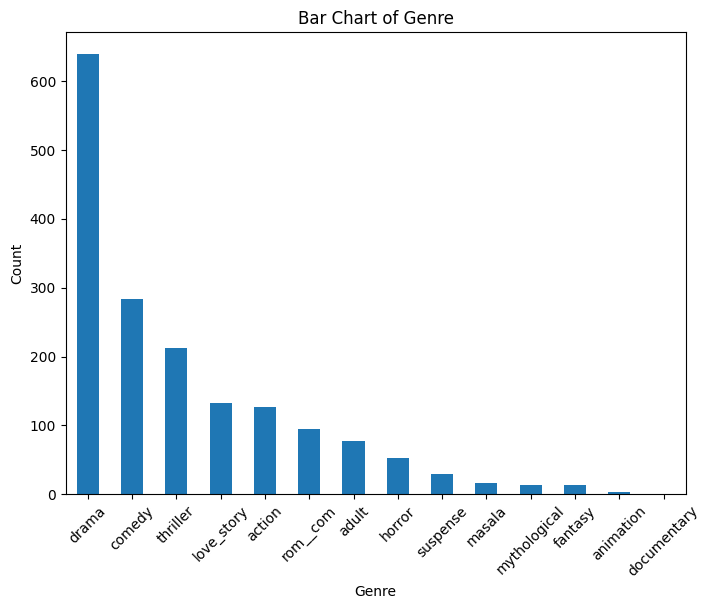

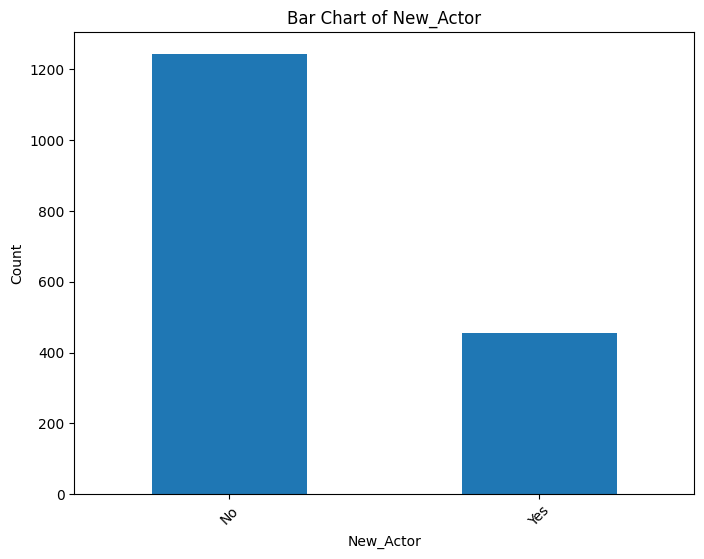

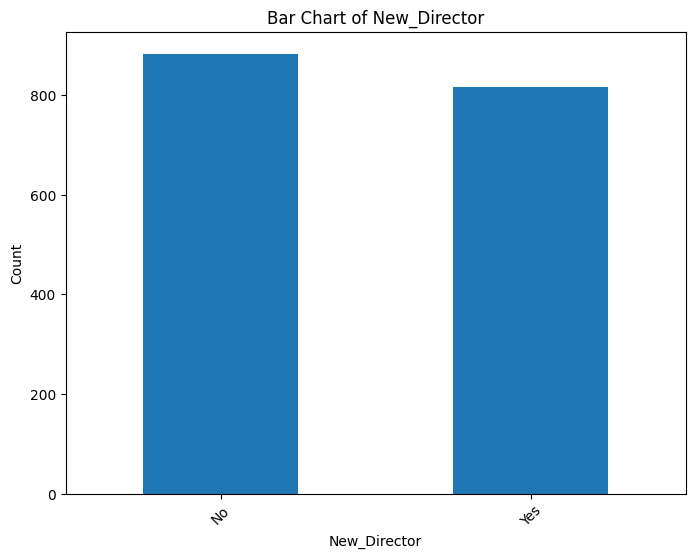

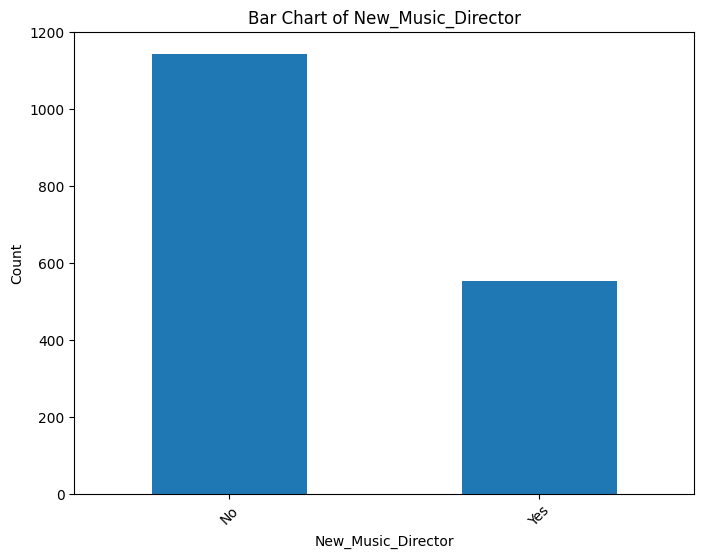

In [17]:
#visualize the categorical column in to bar chart
for column in categorical_columns:
    plt.figure(figsize=(8, 6))
    df[column].value_counts().plot(kind='bar')
    plt.title(f'Bar Chart of {column}')
    plt.xlabel(column)
    plt.ylabel('Count')
    plt.xticks(rotation=45)
    plt.show()

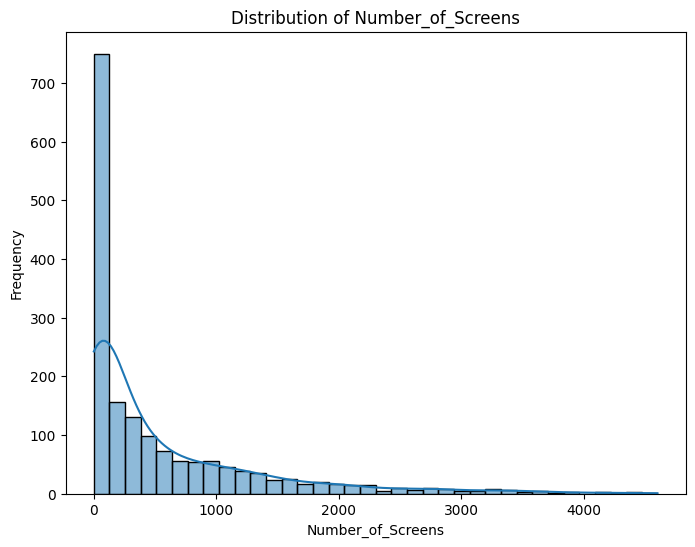

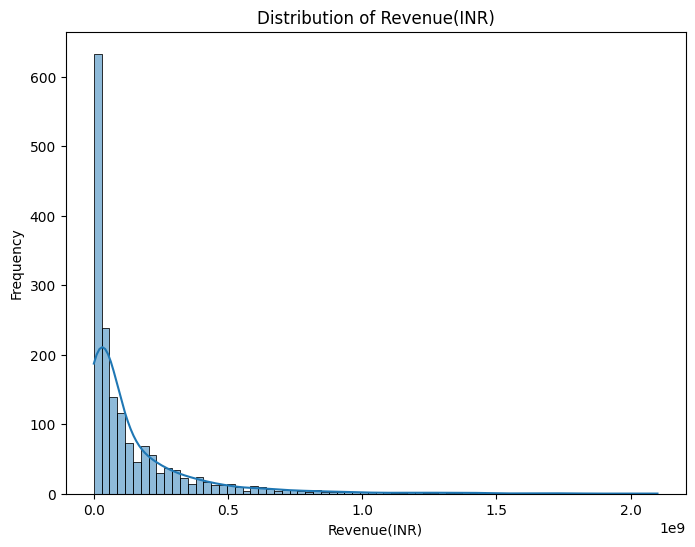

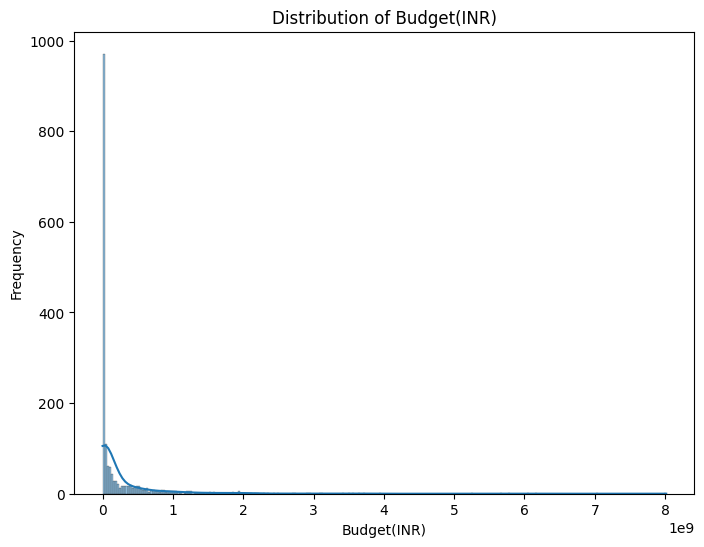

In [14]:
#numerical column distribution
for column in numerical_columns:
    plt.figure(figsize=(8, 6))
    sns.histplot(df[column], kde=True)
    plt.title(f'Distribution of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.show()

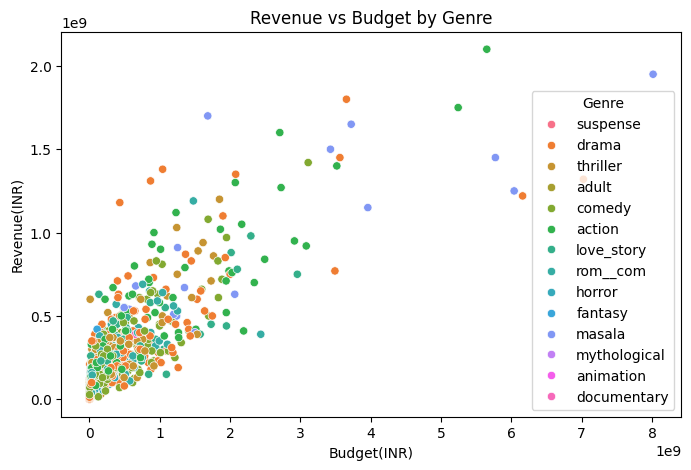

In [18]:
# Revenue vs Budget
plt.figure(figsize=(8, 5))
sns.scatterplot(data=df, x="Budget(INR)", y="Revenue(INR)", hue="Genre")
plt.title("Revenue vs Budget by Genre")
plt.show()

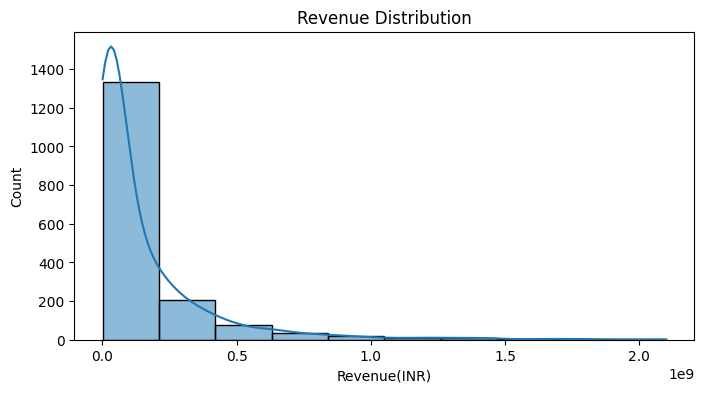

In [19]:
# Revenue distribution
plt.figure(figsize=(8, 4))
sns.histplot(df['Revenue(INR)'], bins=10, kde=True)
plt.title("Revenue Distribution")
plt.show()

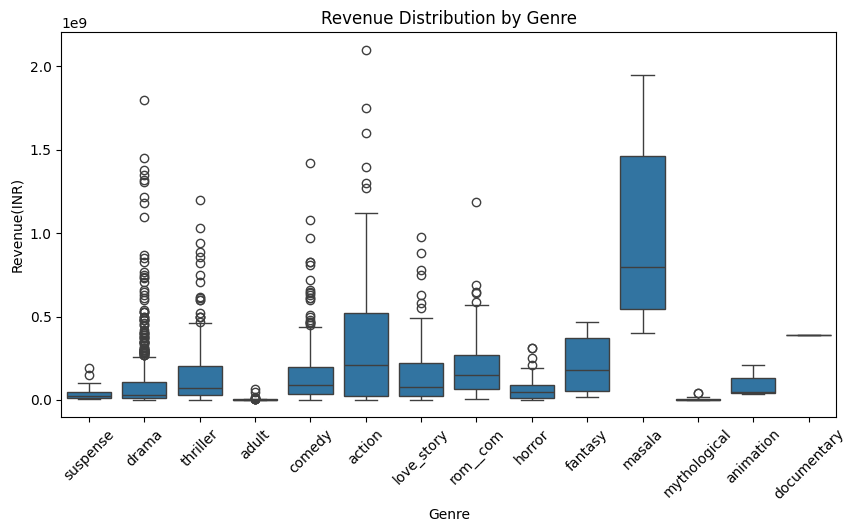

In [20]:
# Revenue by Genre
plt.figure(figsize=(10, 5))
sns.boxplot(data=df, x="Genre", y="Revenue(INR)")
plt.title("Revenue Distribution by Genre")
plt.xticks(rotation=45)
plt.show()

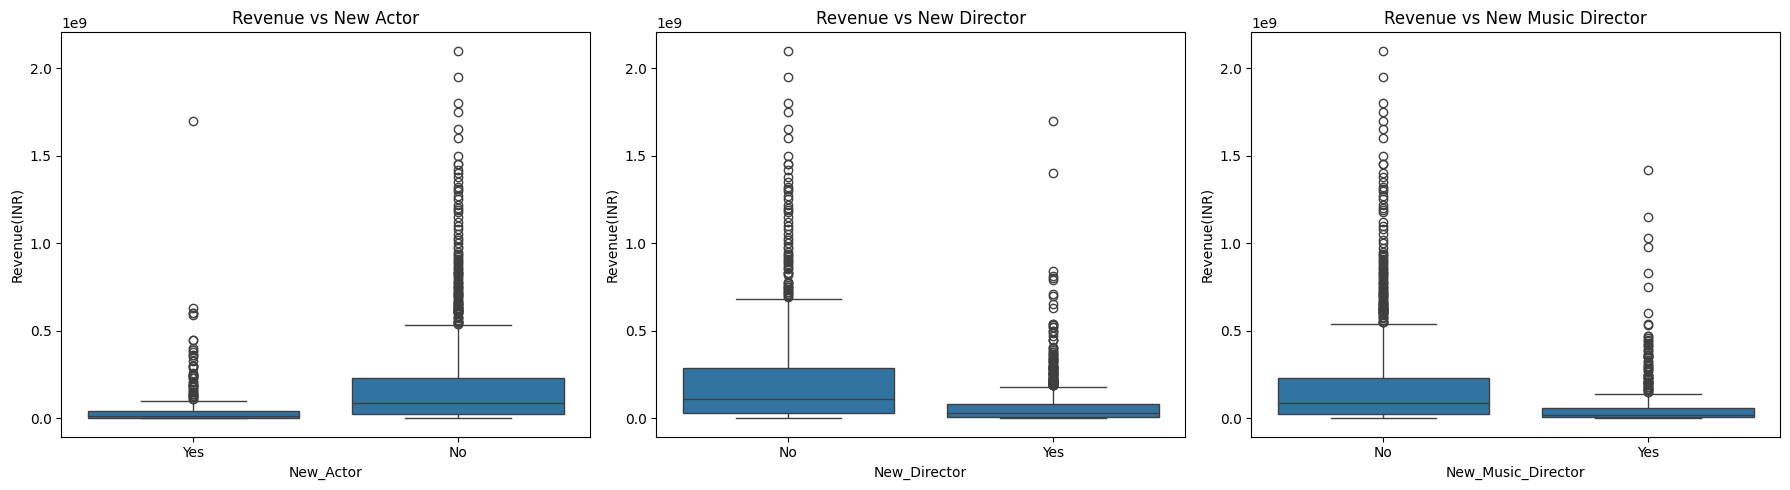

In [22]:
# Revenue by new actor/director/music director
fig, axs = plt.subplots(1, 3, figsize=(18, 5))
sns.boxplot(data=df, x='New_Actor', y='Revenue(INR)', ax=axs[0])
axs[0].set_title("Revenue vs New Actor")

sns.boxplot(data=df, x='New_Director', y='Revenue(INR)', ax=axs[1])
axs[1].set_title("Revenue vs New Director")

sns.boxplot(data=df, x='New_Music_Director', y='Revenue(INR)', ax=axs[2])
axs[2].set_title("Revenue vs New Music Director")

plt.tight_layout()
plt.show()

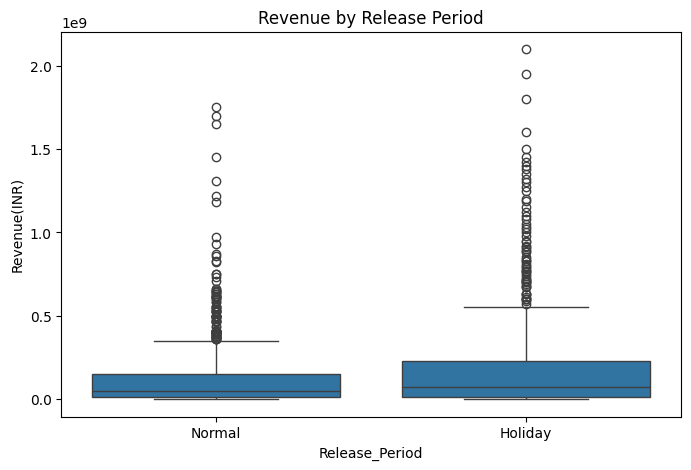

In [24]:
# Revenue by Release Period
plt.figure(figsize=(8, 5))
sns.boxplot(data=df, x="Release_Period", y="Revenue(INR)")
plt.title("Revenue by Release Period")
plt.show()

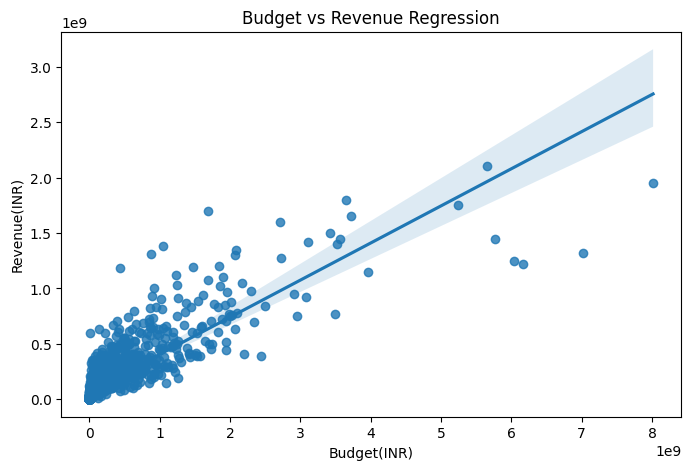

In [26]:
# Budget vs Revenue
plt.figure(figsize=(8, 5))
sns.regplot(data=df, x='Budget(INR)', y='Revenue(INR)')
plt.title('Budget vs Revenue Regression')
plt.show()

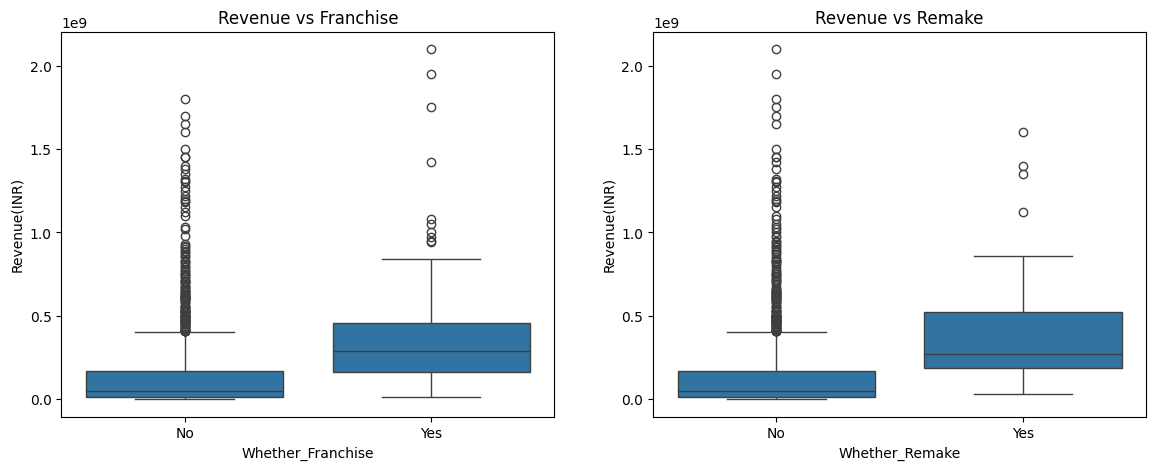

In [28]:
# Franchise and remake impact
fig, axs = plt.subplots(1, 2, figsize=(14, 5))
sns.boxplot(data=df, x="Whether_Franchise", y="Revenue(INR)", ax=axs[0])
axs[0].set_title("Revenue vs Franchise")

sns.boxplot(data=df, x="Whether_Remake", y="Revenue(INR)", ax=axs[1])
axs[1].set_title("Revenue vs Remake")
plt.show()

#***Top 10 Movie On Revenues:-***

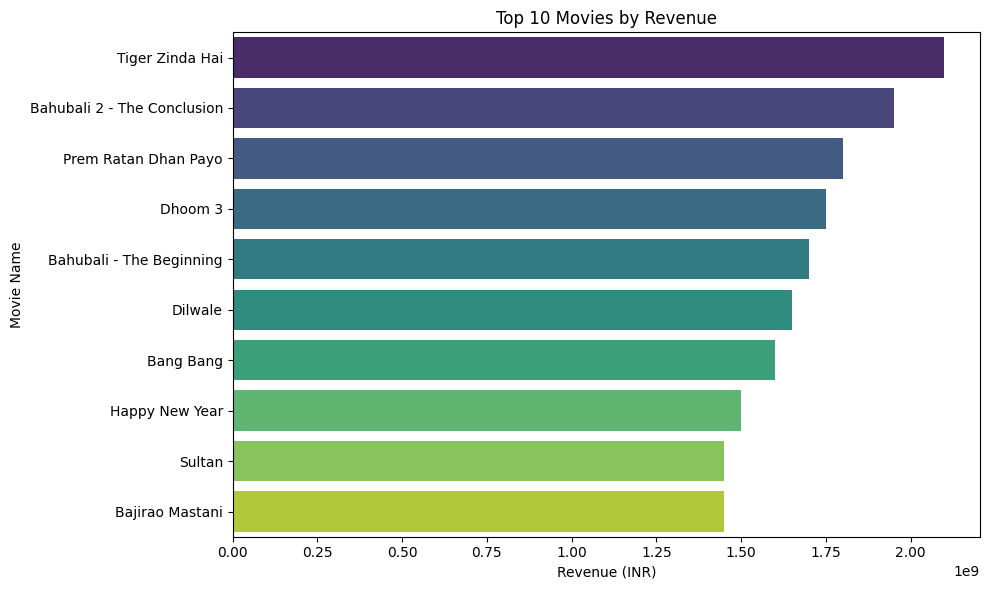

In [31]:
# Top 10 movie name according to revenue
top_10 = df.sort_values(by='Revenue(INR)', ascending=False).head(10)

# Plot
plt.figure(figsize=(10, 6))
sns.barplot(data=top_10, x='Revenue(INR)', y='Movie_Name', palette='viridis')

plt.title('Top 10 Movies by Revenue')
plt.xlabel('Revenue (INR)')
plt.ylabel('Movie Name')
plt.tight_layout()
plt.show()

#***Top 10 Director According to Budget:-***

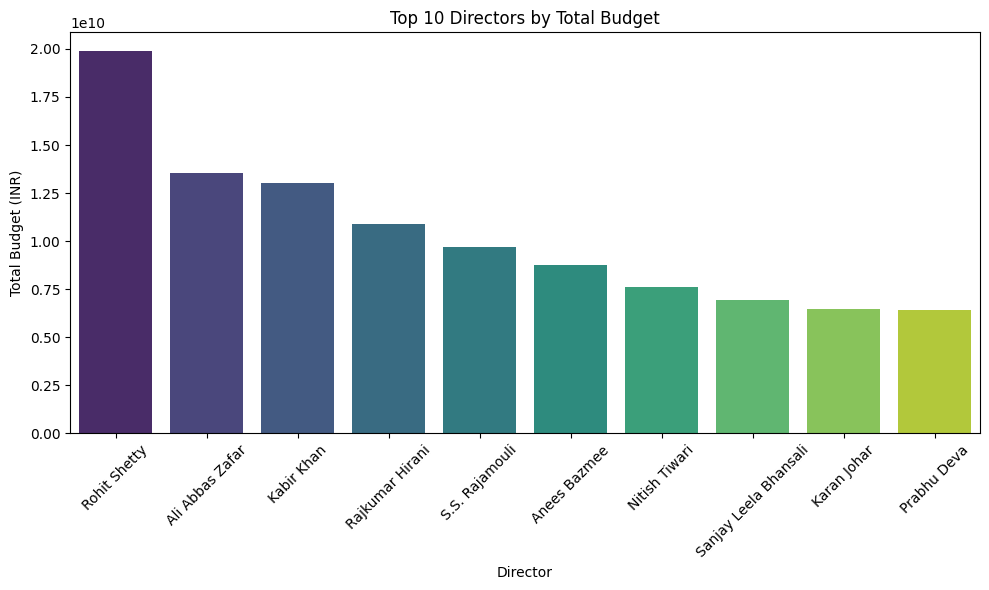

In [32]:
#top 10 director in the industry to get high budget
top_10_director = df.groupby('Director')['Budget(INR)'].sum().sort_values(ascending=False).head(10)
# Plot
plt.figure(figsize=(10, 6))
sns.barplot(x=top_10_director.index, y=top_10_director.values, palette='viridis')
plt.title('Top 10 Directors by Total Budget')
plt.xlabel('Director')
plt.ylabel('Total Budget (INR)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

#***Top 10 director highest number of Screen:-***

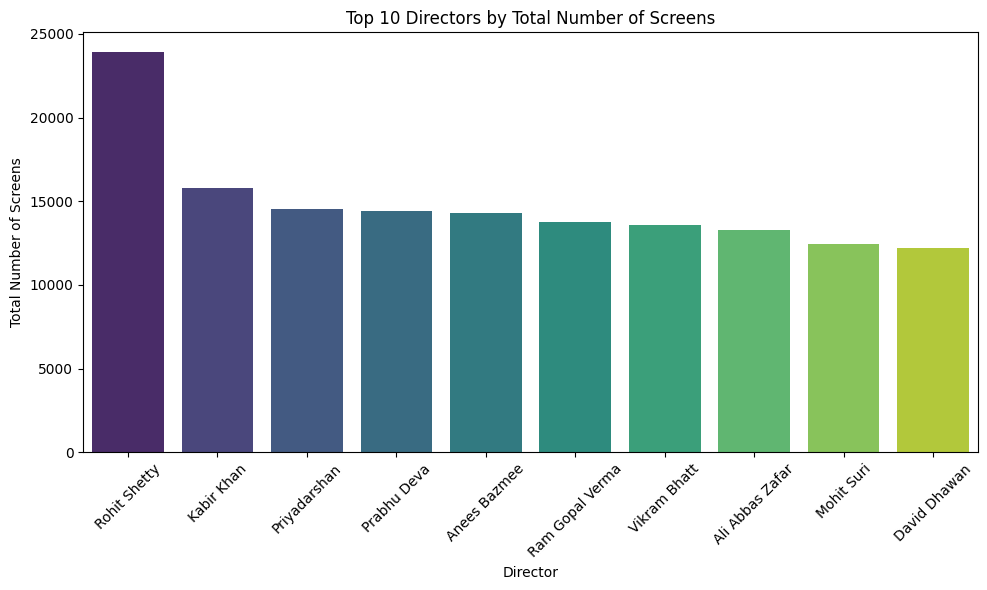

In [35]:
#top 10 director has highest number screen
top_10_director_screen = df.groupby('Director')['Number_of_Screens'].sum().sort_values(ascending=False).head(10)
#plot
plt.figure(figsize=(10, 6))
sns.barplot(x=top_10_director_screen.index, y=top_10_director_screen.values, palette='viridis')
plt.title('Top 10 Directors by Total Number of Screens')
plt.xlabel('Director')
plt.ylabel('Total Number of Screens')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

#***Top 10 Genre make high revenue:-***

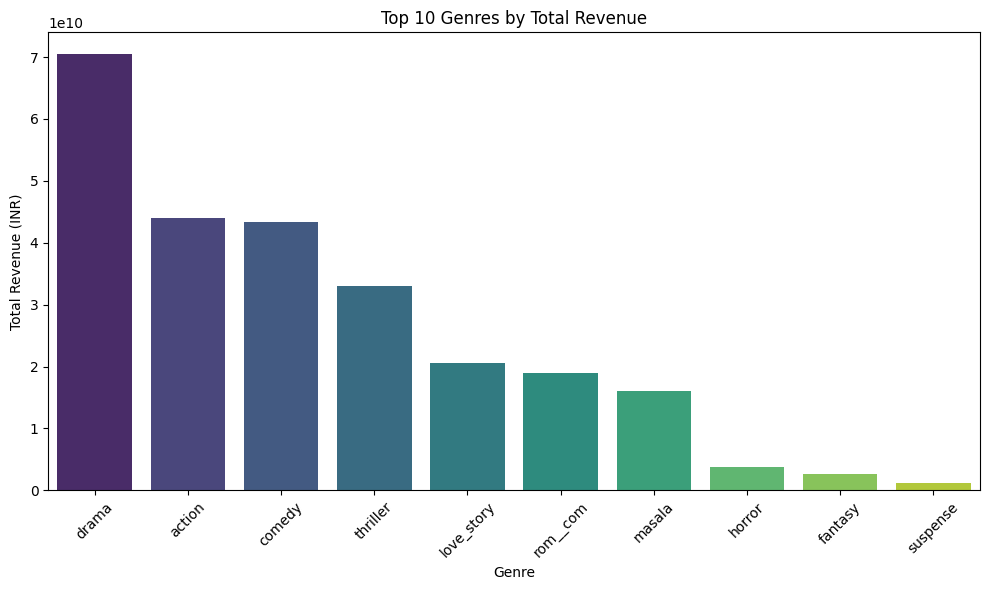

In [33]:
#top 10 genre make high revuene
top_10_genre = df.groupby('Genre')['Revenue(INR)'].sum().sort_values(ascending=False).head(10)
# Plot
plt.figure(figsize=(10, 6))
sns.barplot(x=top_10_genre.index, y=top_10_genre.values, palette='viridis')
plt.title('Top 10 Genres by Total Revenue')
plt.xlabel('Genre')
plt.ylabel('Total Revenue (INR)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

#***Top 10 genure on basics of Budgets:-***

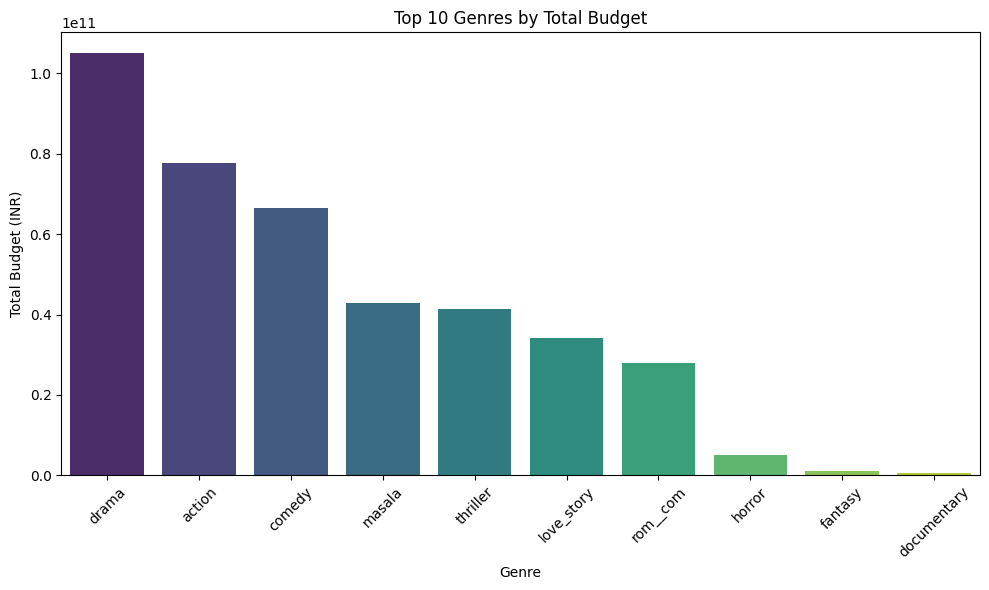

In [34]:
#top 10 genre on bugets
top_10_genre_budget = df.groupby('Genre')['Budget(INR)'].sum().sort_values(ascending=False).head(10)
# Plot
plt.figure(figsize=(10, 6))
sns.barplot(x=top_10_genre_budget.index, y=top_10_genre_budget.values, palette='viridis')
plt.title('Top 10 Genres by Total Budget')
plt.xlabel('Genre')
plt.ylabel('Total Budget (INR)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()